**Data Science and AI for Energy Systems** 

Karlsruhe Institute of Technology

Institute of Automation and Applied Informatics

Summer Term 2024

---

# Exercise VI: Stochastic Differential Equations

**Imports**

In [1]:
# Imports
#!pip install sdeint #install sdeint package if not already installed 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import sdeint
from kramersmoyal import km

## Problem VI.2 (programming) -- Euler-Maruyama Simulation

**Consider the stochastic differential equation,**
\begin{align*}
\dot{\omega} &= -c_1 \omega + \epsilon \xi
\end{align*}
**using the Euler-Maruyama method, we can discretize the equations as follows:**
\begin{align}
\omega_{n+1} &= \omega_n - \delta c_1 \omega_n + \epsilon \Delta W_n
\end{align}
**where $ \omega_n $ represents the value of $\omega$ at time step $n$, $\delta$ is the step size, and $\epsilon$ is a positive constant representing the intensity of the noise $\xi$ ($=\frac{dW(t)}{dt}$ for $W(t)$ representing the Wiener process). <br> Further, $\Delta W_n $ represents the increments of a Wiener process at time step $ n $, $\Delta W_n$ is normally distributed with mean $0$ and standard deviation $\sqrt{\delta}$.**

**Note that the SDE can also be written as $d\omega = -c_1 \omega dt + \epsilon d W(t)$**

***
**(a) Simulate a stochastic time series described by (3),  using the Euler-Maruyama method with $c_1 = 0.05$, $\delta = 0.1$, $\epsilon=0.01$, initial condition $\omega_0$ = $0.1$, and a time span $t=[0,100]$.**

In [2]:
def euler_maruyama(c_1,delta,t_start,t_end,epsilon,omega_0):
    t = np.arange(t_start, t_end, delta)
    dW = np.random.normal(0, np.sqrt(delta), len(t))
    omega = np.zeros(len(t))
    omega[0] = omega_0
    for i in range(1,len(t)):
        omega[i] = omega[i-1] + delta * (- c_1 * omega[i-1]) + epsilon * dW[i]
    return omega    

c_1 = 0.05
epsilon = 0.01
omega_0 = 0.1
delta = 0.1
t_start = 0
t_end = 100
t = np.arange(t_start, t_end, delta)

omega_euler_maruyama = euler_maruyama(c_1 = c_1, delta = delta, t_start=t_start, t_end=t_end, epsilon = epsilon, omega_0 = omega_0)

***
**(b) The library *sdeint* is constructed for simulating and analyzing stochastic differential equations. Use *sdeint.itoint* as an alternative for the self-constructed Euler-Maruyama method in (a), using the same parameters.**

In [3]:
'''For using sdeint.itoint, you can use the following example as a guide (see [https://pypi.org/project/sdeint/](https://pypi.org/project/sdeint/)):

Integrate the one-dimensional Ito equation   dx = -(a + x*b**2)*(1 - x**2)dt + b*(1 - x**2)dW
with initial condition x0 = 0.1:

a = 1.0
b = 0.8
tspan = np.linspace(0.0, 5.0, 5001)
x0 = 0.1

def f(x, t):
    return -(a + x*b**2)*(1 - x**2)

def g(x, t):
    return b*(1 - x**2)

result = sdeint.itoint(f, g, x0, tspan)
'''

'For using sdeint.itoint, you can use the following example as a guide (see [https://pypi.org/project/sdeint/](https://pypi.org/project/sdeint/)):\n\nIntegrate the one-dimensional Ito equation   dx = -(a + x*b**2)*(1 - x**2)dt + b*(1 - x**2)dW\nwith initial condition x0 = 0.1:\n\na = 1.0\nb = 0.8\ntspan = np.linspace(0.0, 5.0, 5001)\nx0 = 0.1\n\ndef f(x, t):\n    return -(a + x*b**2)*(1 - x**2)\n\ndef g(x, t):\n    return b*(1 - x**2)\n\nresult = sdeint.itoint(f, g, x0, tspan)\n'

In [4]:
'''Now apply the method to our example:'''
def f(x, t):
    return -c_1 * x

def g(x, t):
    return epsilon

omega_sdeint = sdeint.itoint(f, g, omega_0, t).reshape(-1)

***
**(c) Plot the results from (a) and (b) in the $(t,\omega)$-  plane.**

Text(0, 0.5, '$\\omega$')

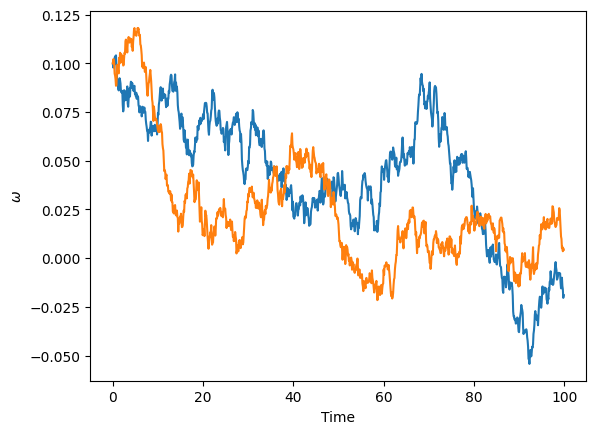

In [5]:
plt.plot(t,omega_euler_maruyama)
plt.plot(t,omega_sdeint)
plt.xlabel('Time')
plt.ylabel(r'$\omega$')

***
**(d) Use the Euler-Maruyama algorithm from (a) to experiment with different parameter values of $c_1$, such as $c_1 \in \{-0.1,0.1, 0.3,0.5\}$. Observe how changing these parameters affects the trajectories of $\omega$.**

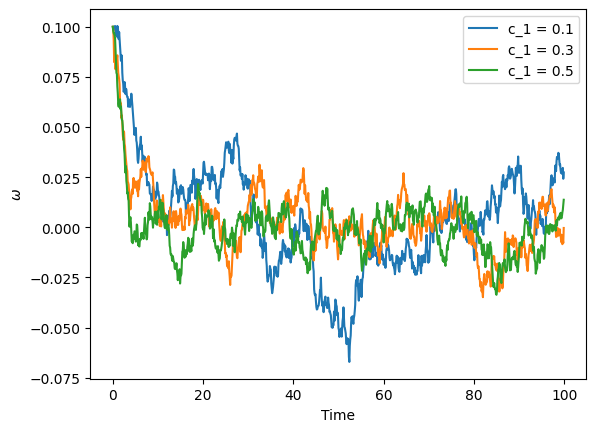

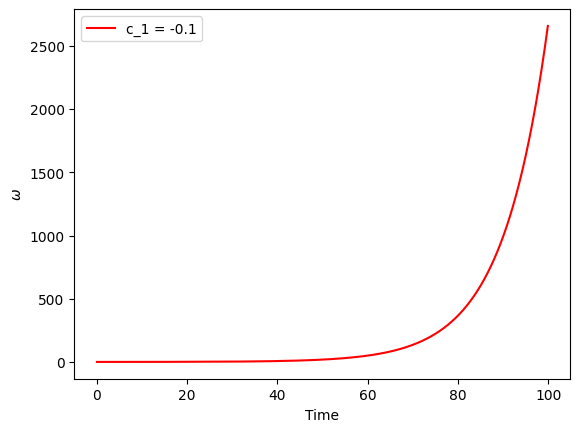

In [6]:
for c_1 in [0.1,0.3,0.5]:
    omega_euler_maruyama = euler_maruyama(c_1 = c_1,delta = delta,t_start=t_start,t_end=t_end,epsilon = epsilon , omega_0=omega_0)
    plt.plot(t,omega_euler_maruyama, label = 'c_1 = ' + str(c_1))
plt.xlabel('Time')
plt.ylabel(r'$\omega$')
plt.legend()
plt.show()

c_1  = -0.1
omega_euler_maruyama = euler_maruyama(c_1 = c_1,delta = delta,t_start=t_start,t_end=t_end,epsilon = epsilon, omega_0= omega_0)
plt.plot(t,omega_euler_maruyama, label = 'c_1 = ' + str(c_1), color = 'red')
plt.xlabel('Time')
plt.ylabel(r'$\omega$')
plt.legend()


Note that the trajectories converge fastor to 0 for larger $c_1>0$, and it diverges for $c_1 < 0$.

***
**(e) As in (d), experiment with different parameter values for $\epsilon$ such as $\epsilon \in \{0.001,0.01,0.1,0.5\}$. Observe how changing these parameters affects the trajectories of $\omega$.**

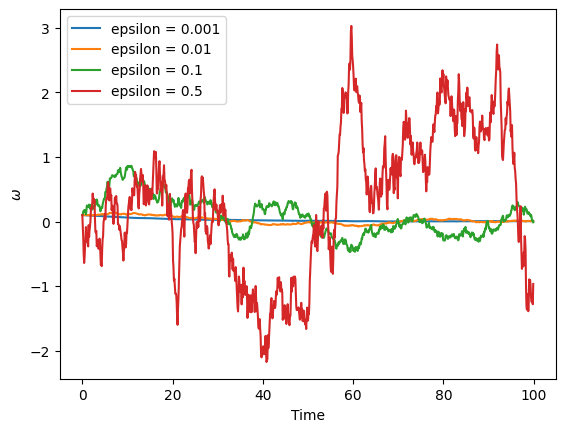

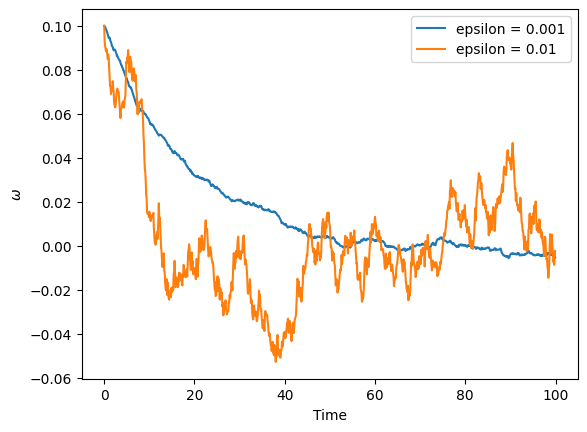

In [7]:
for epsilon in [0.001,0.01,0.1,0.5]:
    c_1 = 0.05
    omega_euler_maruyama = euler_maruyama(c_1 = c_1,delta = delta,t_start=t_start,t_end=t_end,epsilon = epsilon , omega_0=omega_0)
    plt.plot(t,omega_euler_maruyama, label = 'epsilon = ' + str(epsilon))
    plt.legend()
plt.xlabel('Time')
plt.ylabel(r'$\omega$')
plt.show()

# We look at the effect of small epsilon on the trajectories in detail
for epsilon in [0.001,0.01]:
    c_1 = 0.05
    omega_euler_maruyama = euler_maruyama(c_1 = c_1,delta = delta,t_start=t_start,t_end=t_end,epsilon = epsilon , omega_0=omega_0)
    plt.plot(t,omega_euler_maruyama, label = 'epsilon = ' + str(epsilon))
    plt.legend()
plt.xlabel('Time')
plt.ylabel(r'$\omega$')
plt.show()

Note that the fluctuations for small $\epsilon$-values are smaller than for larger values of $\epsilon$.

## Problem VI.3 (programming) -- Estimation of Kramers-Moyal coefficients (drift and diffusion)

***
**(a) Generate a trajectory of the Ornstein-Uhlenbeck process with the Euler–Maruyama integration method as in Exercise 2, with $c_1 = 0.3$, $\epsilon = 0.1$, initial condition $\omega(0)=0.1$ and time step of numerical integration $\delta= 0.001$, and time span $t=[0,2000]$.**

In [8]:
c_1 = 0.3
epsilon = 0.1
omega_0 = 0.1
delta = 0.001
t_start = 0
t_end = 2000
omega = euler_maruyama(c_1 = c_1, delta = delta, t_start=t_start, t_end=t_end, epsilon = epsilon, omega_0 = omega_0)

***
**(b) Plot the trajectory over time.**

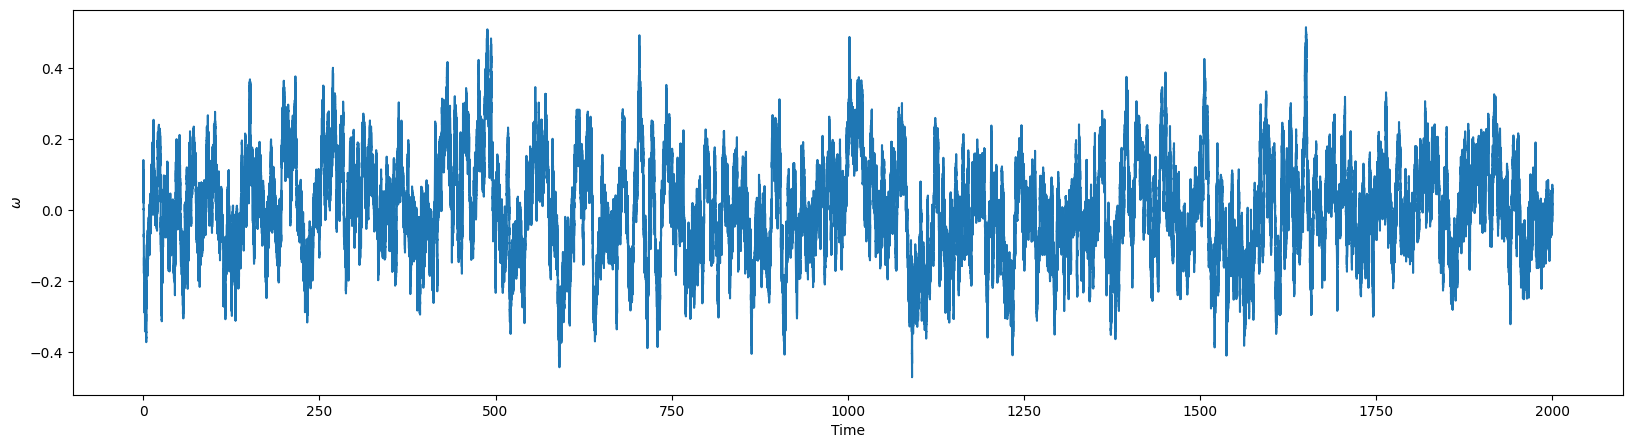

In [9]:
t = np.arange(t_start, t_end, delta)
plt.figure(figsize=(20,5))
plt.plot(t,omega)
plt.xlabel('Time')
plt.ylabel(r'$\omega$')
plt.show()

***
**(c) The stochastic different \eqref{Orn_Uhl_Ex3} is connected to a Fokker-planck equation** 
\begin{align}
\frac{\partial }{\partial t}p(\omega,t)=-\frac{\partial}{\partial \omega}[D_1(\omega,t)p(,t)]+ \frac{\partial^2}{\partial \omega^2}[D_2(\omega,t)p(\omega,t)],
\end{align}
 **where $D_1(\omega,t)$ denotes the first Kramers-Moyal (KM) coefficient (also drift), and $D_2(\omega,t)$ is the second Kramers-Moyal coefficient (also diffusion). See also slide 22 in lecture 6.<br>
 What are the first and second KM coefficients for the Ornstein-Uhlenbeck process, given the parameters from (a)?**

Use the formulas from slide 22:
The first Kramers-Moyal coefficient is given as 
\begin{align*}D_1(\omega,t) = -c_1 \omega,\end{align*}
 and the second Kramers-Moyal coefficient is given as 
\begin{align*}D_2(\omega,t) = \epsilon^2/2.\end{align*}

***
**(d) Use the library *kramersmoyal* to estimate the first two Kramers-Moyal coefficients from the data, you can use *kramersmoyal.km(data, powers = 2, bw = 0.05)* to perform the calculation.**

For details see also [https://github.com/LRydin/KramersMoyal](https://github.com/LRydin/KramersMoyal).

In [15]:
# We consider the time series omega as our data
# Use kmc, x_axis = kramersmoyal.km(data, powers = 2, bw = 0.05)
# The i-th KM coefficient is given by kmc[i]'''



kmc, x_axis  = km(omega, powers = 2, bw = 0.05)
x_axis[0][500:-500]

array([-0.41163603, -0.41141902, -0.411202  , ...,  0.45578373,
        0.45600075,  0.45621777])

***
**(e) Visualise the estimated first and second Kramers-Moyal coefficients from (d). What kind of curve do you notice?**

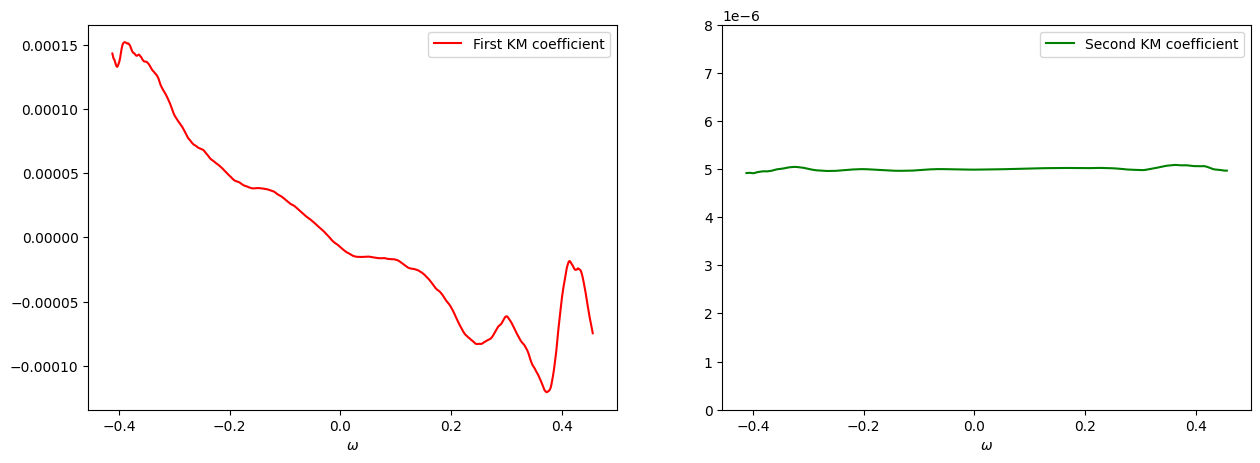

In [16]:
# Plot not necessarily the entire x_axis, but for example use x_axis[0][500:-500] (note that x_axis is a list of one array, so you need to use x_axis[0])
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x_axis[0][500:-500],kmc[1,500:-500], color = 'red', label = 'First KM coefficient')
ax[0].set_xlabel(r'$\omega$')
ax[0].legend()
ax[1].set_ylim(0,8e-6)
ax[1].plot(x_axis[0][500:-500],kmc[2,500:-500], color = 'green', label = 'Second KM coefficient')
ax[1].set_xlabel(r'$\omega$')
ax[1].legend()

***
**(f) Repeat the plot from (e), this time divide the estimated Kramers-Moyal coefficients by $\delta$ (as the time step of the time series is $\delta$). Add the theoretical values of the KM coefficients from (c) to the plots. What can you observe?**

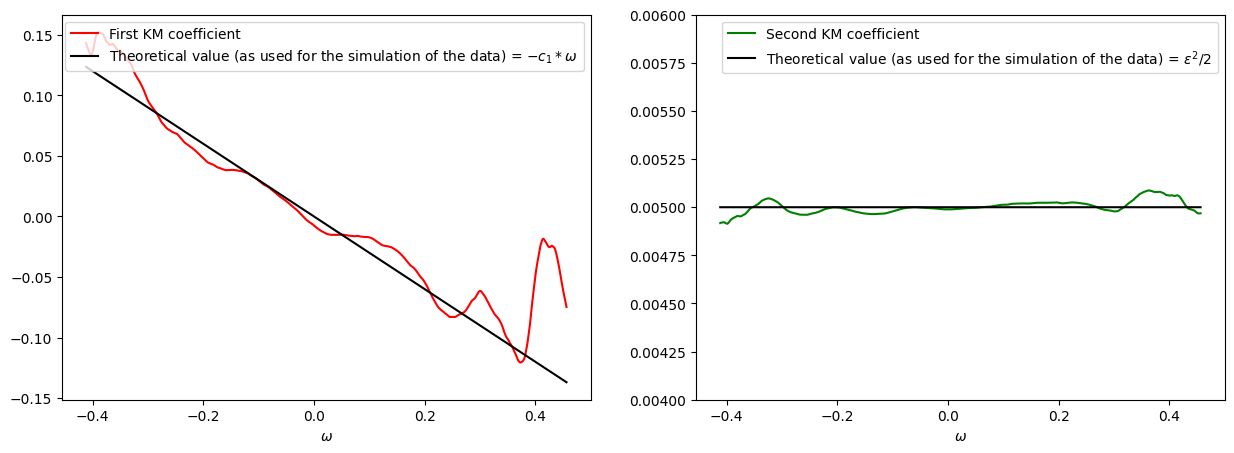

In [17]:
# Plot again not necessarily the entire x_axis, but for example use x_axis[500:-500]

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x_axis[0][500:-500],kmc[1,500:-500]/delta, color = 'red', label = 'First KM coefficient')
ax[0].plot(x_axis[0][500:-500],-x_axis[0][500:-500]*c_1, color = 'black', label = r'Theoretical value (as used for the simulation of the data) = $-c_1 * \omega$')
ax[0].set_xlabel(r'$\omega$')
ax[0].legend()
ax[1].set_ylim(4e-3,6e-3)
ax[1].plot(x_axis[0][500:-500],kmc[2,500:-500]/delta, color = 'green', label = 'Second KM coefficient')
ax[1].plot(x_axis[0][500:-500],0*x_axis[0][500:-500]+(epsilon**2)/2, color = 'black', label = r'Theoretical value (as used for the simulation of the data) = $\epsilon^2/2$')
ax[1].set_xlabel(r'$\omega$')
ax[1].legend()

We see that the estimated Kramers-Moyal coefficients fit quite well to the theoretical values that we used for constructing the data.

## Problem VI.4 (programming) -- Estimating Kramers-Moyal coefficients (drift and diffusion) from an empirical frequency time series

**We consider an empirical dataset of power grid frequency data with a 1-second time resolution, the dataset *frequency\_sample\_2015\_ex6.csv* can be found in [https://bwsyncandshare.kit.edu/s/QPySS7eZCWjSjYP](https://bwsyncandshare.kit.edu/s/QPySS7eZCWjSjYP). Note that this is the same dataset as used in Exercise V.3.**

***
**(a) Plot the stochastic trajectory over time.**

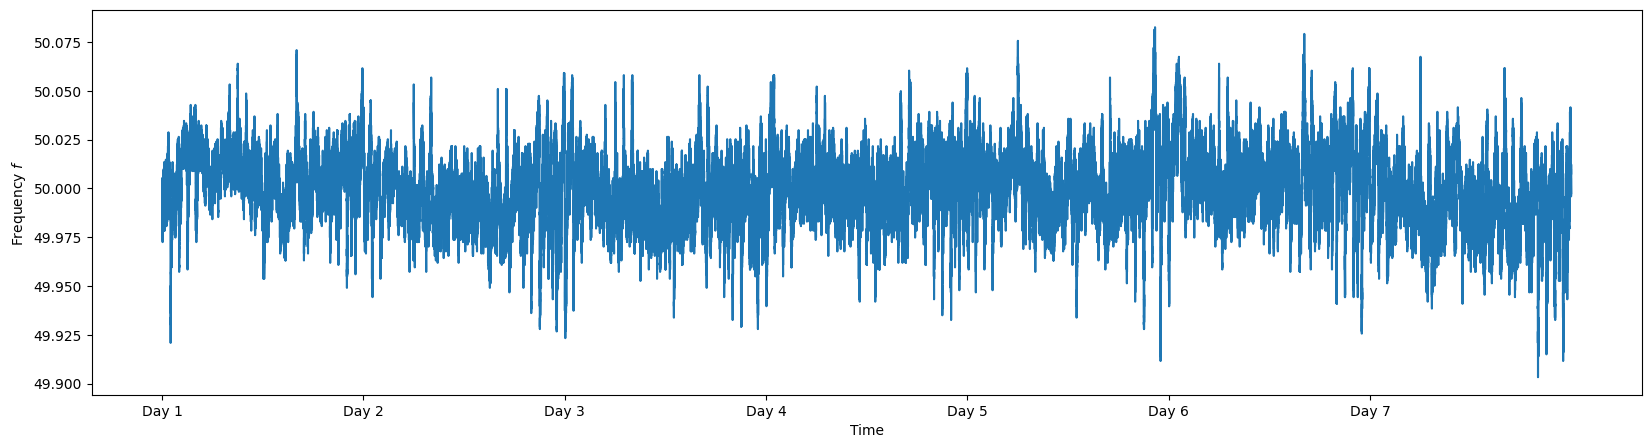

In [18]:
data = pd.read_csv('data/frequency_sample_2015_ex6.csv')
data = data.values.reshape(-1)
plt.figure(figsize=(20,5))
plt.plot(data)
plt.xticks(np.arange(0, len(data), 3600*24), ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'])
plt.xlabel('Time')
plt.ylabel(r'Frequency $f$')
plt.show()

# Length of data: one week with 1-second time resolution

***
**(b) Apply a Gaussian filter in order to detrend the data, i.e. separate the data into trend and stochastic dynamics. Use *scipy.ndimage.gaussian\_filter1d*, using as standard deviation for the Gaussian kernel *sigma=*$60$ (seconds). Then plot the time series together with the trend, and in a separate figure the detrended stochastic dynamics (detrended data  = data - trend).**

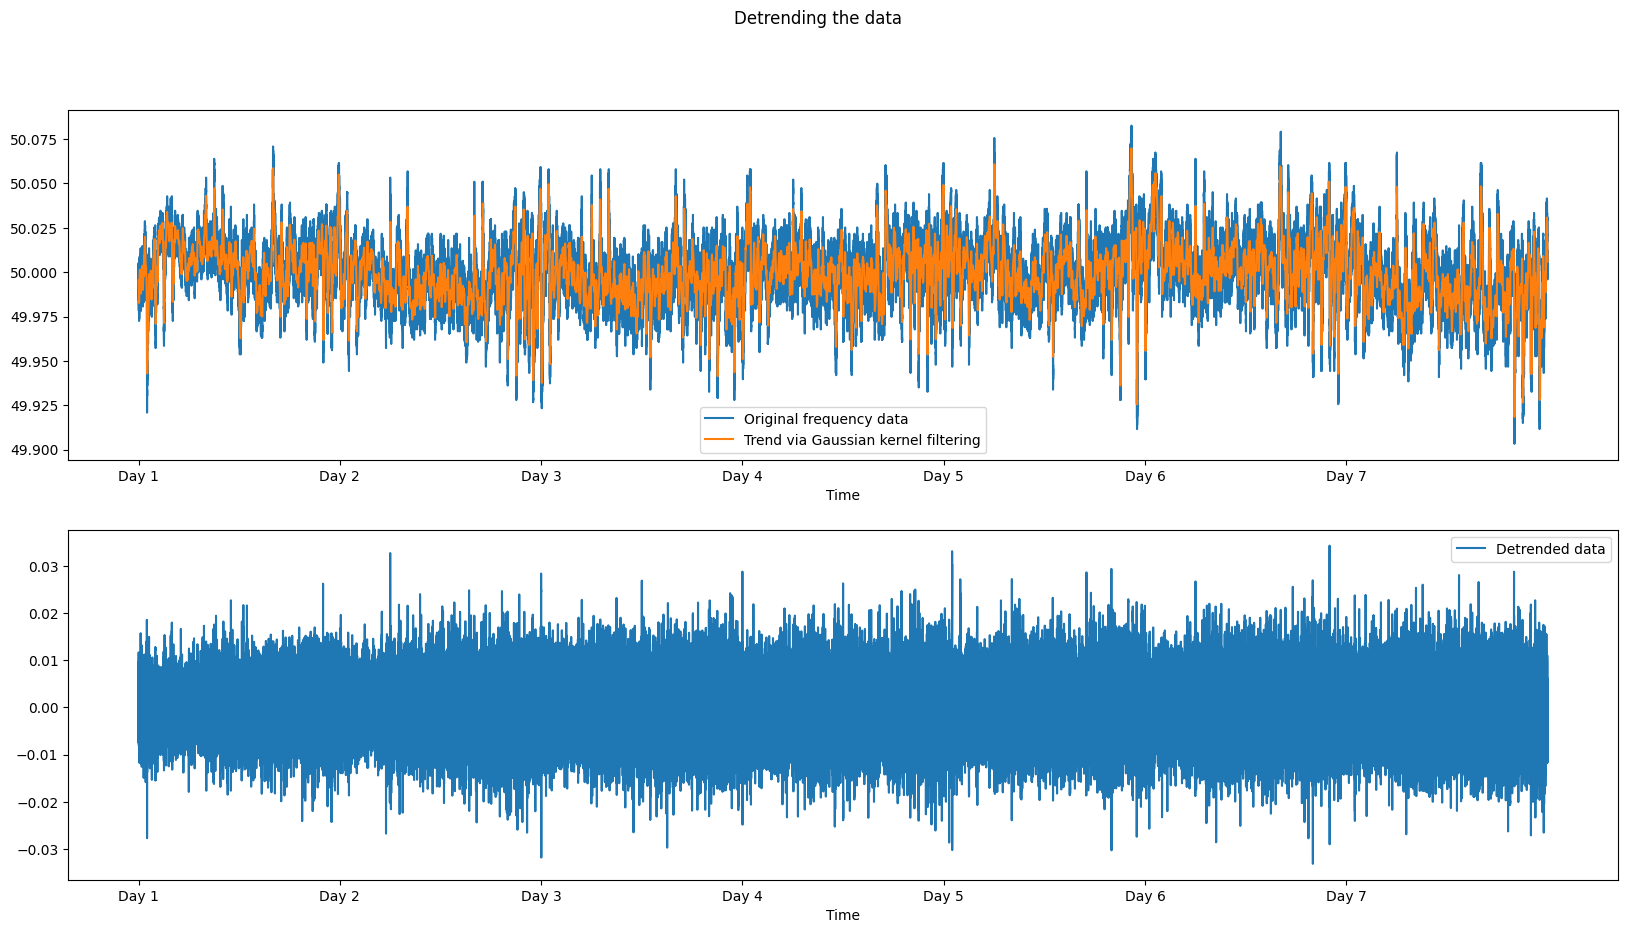

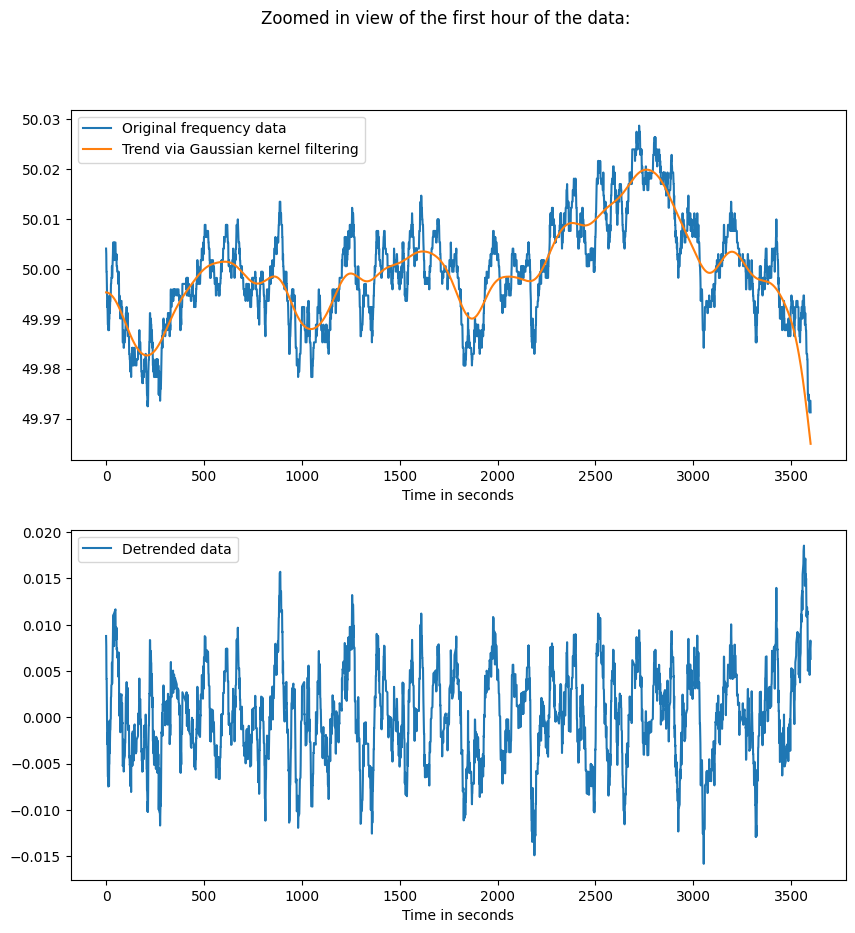

In [19]:
trend = sc.ndimage.gaussian_filter1d(data,sigma=60)
detrended_data = data - trend

fig,ax = plt.subplots(2,1,figsize=(20,10))
fig.suptitle('Detrending the data')
ax[0].plot(data, label = 'Original frequency data')
ax[0].plot(trend, label = 'Trend via Gaussian kernel filtering')
ax[0].set_xticks(np.arange(0, len(data), 3600*24), ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'])
ax[0].set_xlabel('Time')
ax[0].legend()
ax[1].plot(detrended_data, label = 'Detrended data')
ax[1].set_xticks(np.arange(0, len(data), 3600*24), ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'])
ax[1].set_xlabel('Time')
ax[1].legend()
plt.show()

# Additionally, we also zoom in a little bit into the time series to see some details:
fig,ax = plt.subplots(2,1,figsize=(10,10))
fig.suptitle('Zoomed in view of the first hour of the data:')
ax[0].plot(data[:3600], label = 'Original frequency data')
ax[0].plot(trend[:3600], label = 'Trend via Gaussian kernel filtering')
ax[0].set_xlabel('Time in seconds')
ax[0].legend()
ax[1].plot(detrended_data[:3600], label = 'Detrended data')
ax[1].set_xlabel('Time in seconds')
ax[1].legend()
plt.show()



***
**(c) As in Exercise 3, use the Kramers-Moyal package to estimate the first two Kramers-Moyal coefficients from the detrended data, you can use *kramersmoyal.km(data, powers = 2, bw = 0.05)* to perform the calculation.**

In [20]:
kmc, x_axis  = km(detrended_data, powers = 2, bw = 0.05)

# Hint: Try that also out for smaller values of bw, e.g. bw = 0.01

***
**(d) Visualise the estimated first and second Kramers-Moyal coefficients from (c). What can you observe?**

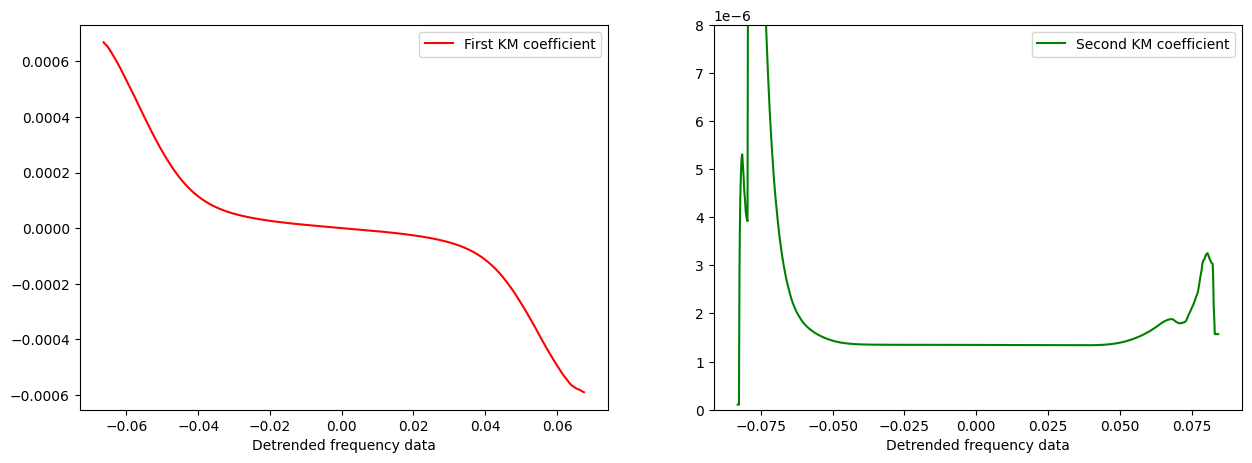

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x_axis[0][500:-500],kmc[1,500:-500], color = 'red', label = 'First KM coefficient')
ax[0].set_xlabel('Detrended frequency data')
ax[0].legend()
ax[1].set_ylim(0,8e-6)
ax[1].plot(x_axis[0][:],kmc[2,:], color = 'green', label = 'Second KM coefficient')
ax[1].set_xlabel('Detrended frequency data')
ax[1].legend()

Note that the large deviations at the edge of the plots (for relatively high absolute values of the detrended data) are usually due to the fact that only few data are available for these values.